In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
import seaborn as sns
import pandas as pd
import numpy as np 
import scipy.stats as stats
data_df = pd.read_csv('../../datasets/credit_card_fraud_dataset.csv')
data_df.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0


In [2]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   TransactionDate  100000 non-null  object 
 2   Amount           100000 non-null  float64
 3   MerchantID       100000 non-null  int64  
 4   TransactionType  100000 non-null  object 
 5   Location         100000 non-null  object 
 6   IsFraud          100000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ MB


In [3]:
data_df['Amount'].describe()

count    100000.000000
mean       2497.092666
std        1442.415999
min           1.050000
25%        1247.955000
50%        2496.500000
75%        3743.592500
max        4999.770000
Name: Amount, dtype: float64

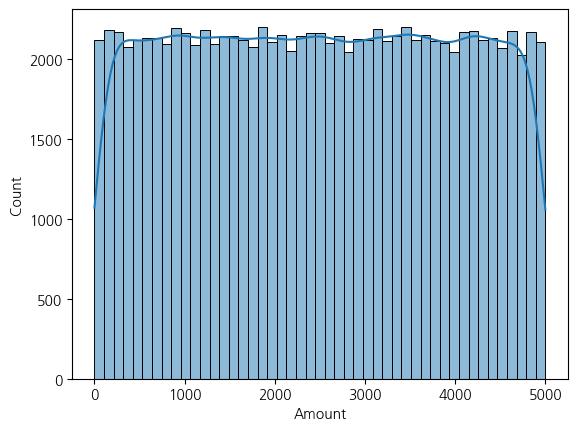

In [4]:
sns.histplot(data=data_df, x='Amount', kde=True)
plt.show()

In [5]:
data_df['MerchantID'].describe()

count    100000.000000
mean        501.676070
std         288.715868
min           1.000000
25%         252.000000
50%         503.000000
75%         753.000000
max        1000.000000
Name: MerchantID, dtype: float64

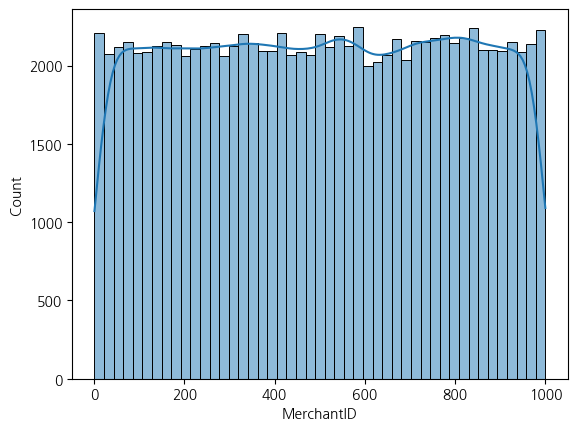

In [6]:
sns.histplot(data=data_df, x='MerchantID', kde=True)
plt.show()

In [7]:
data_df['TransactionType'].value_counts()


TransactionType
refund      50131
purchase    49869
Name: count, dtype: int64

In [8]:
data_df['Location'].value_counts()

Location
Chicago         10193
San Diego       10111
Dallas          10076
San Antonio     10062
New York         9993
Houston          9991
Phoenix          9960
Los Angeles      9936
Philadelphia     9873
San Jose         9805
Name: count, dtype: int64

In [9]:
data_df['IsFraud'].value_counts()


IsFraud
0    99000
1     1000
Name: count, dtype: int64

In [10]:
data_df['TransactionDate'].value_counts()


TransactionDate
2023-10-30 06:53:36.027441    1
2024-07-11 10:55:36.027444    1
2023-11-23 08:37:36.027449    1
2024-09-07 05:03:36.027453    1
2024-03-29 11:33:36.027457    1
                             ..
2024-04-13 23:50:35.462850    1
2024-07-12 18:51:35.462858    1
2024-08-30 01:52:35.462867    1
2024-01-02 11:31:35.462875    1
2024-05-12 12:25:35.462885    1
Name: count, Length: 100000, dtype: int64

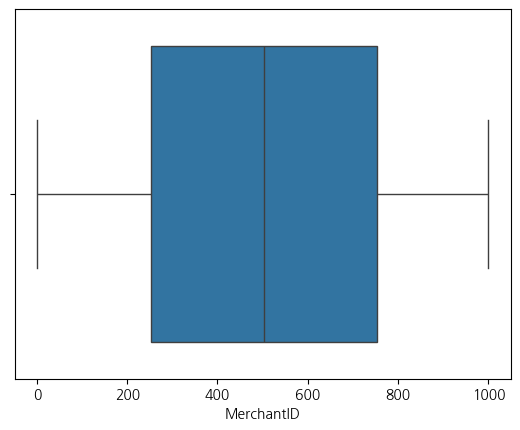

In [12]:
sns.boxplot(data=data_df, x='MerchantID')
plt.show()

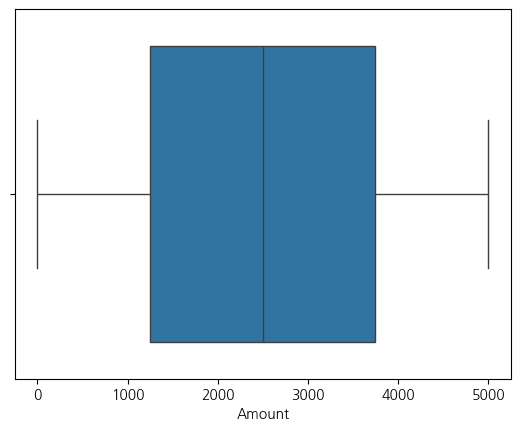

In [13]:
sns.boxplot(data=data_df, x='Amount')
plt.show()

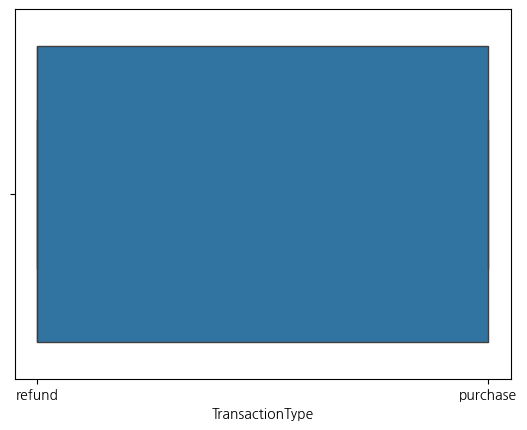

In [14]:
sns.boxplot(data=data_df, x='TransactionType')
plt.show()

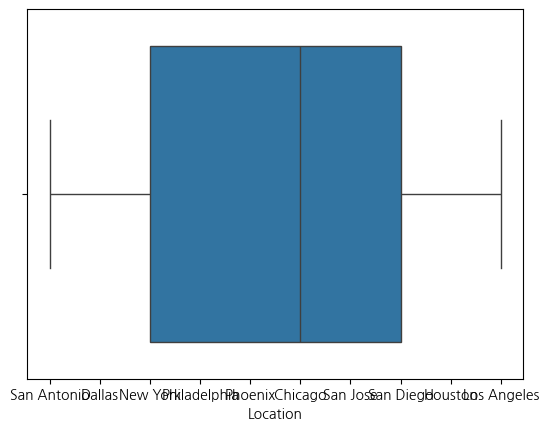

In [15]:
sns.boxplot(data=data_df, x='Location')
plt.show()

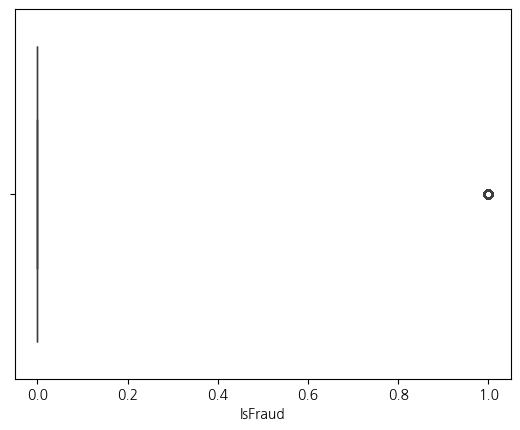

In [16]:
sns.boxplot(data=data_df, x='IsFraud')
plt.show()

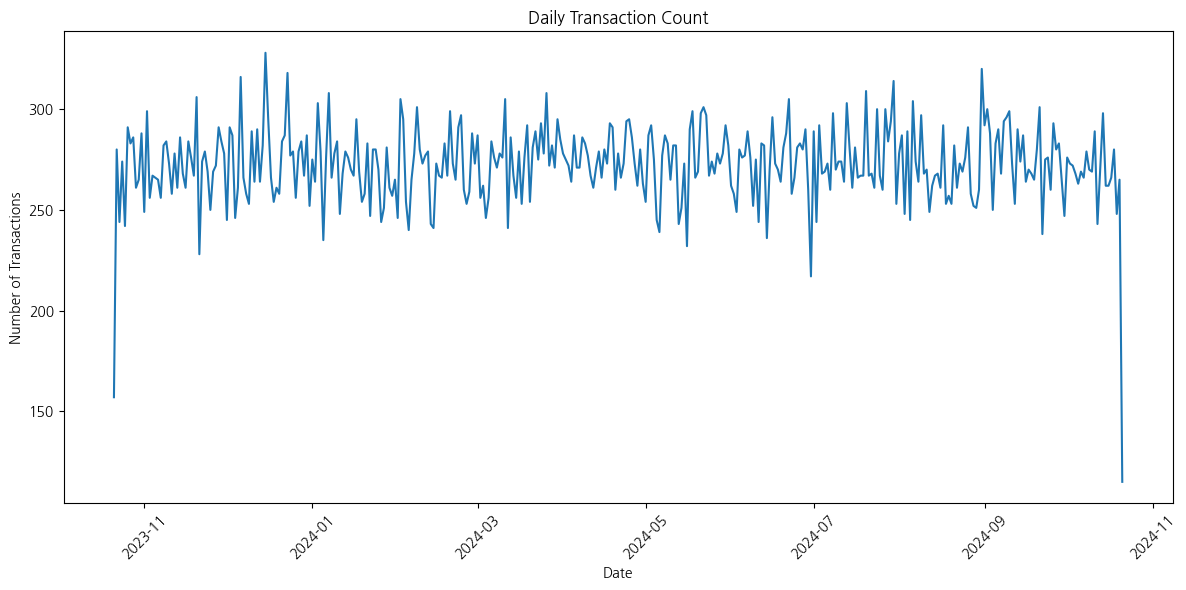

In [20]:
# 1. 날짜 형식 변환 (datetime으로 변환 후 날짜만 추출)
data_df['Date'] = pd.to_datetime(data_df['TransactionDate']).dt.date

# 2. 일별 거래 횟수 계산
daily_counts = data_df.groupby('Date').size().reset_index(name='count')

# 3. Seaborn으로 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_counts, x='Date', y='count')

# 그래프 꾸미기
plt.title('Daily Transaction Count')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()